# Airbnb - Data Analysis
Data source: Inside Airbnb https://insideairbnb.com/bangkok/


# Loading Data

In [ ]:
import pandas as pd
listings_df = pd.read_csv("/content/listings.csv")
calendar_df = pd.read_csv("/content/calendar_bangkok.csv")
review_df = pd.read_csv("/content/reviews.csv")

# Data Cleaning

## Data Cleaning - listing

In [ ]:
import pandas as pd
listings_df = pd.read_csv("/content/listings.csv")

In [ ]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28196 entries, 0 to 28195
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            28196 non-null  int64  
 1   listing_url                                   28196 non-null  object 
 2   scrape_id                                     28196 non-null  int64  
 3   last_scraped                                  28196 non-null  object 
 4   source                                        28196 non-null  object 
 5   name                                          28196 non-null  object 
 6   description                                   27430 non-null  object 
 7   neighborhood_overview                         9658 non-null   object 
 8   picture_url                                   28196 non-null  object 
 9   host_id                                       28196 non-null 

In [ ]:
# remove url column

cleaned_listings_df = listings_df.drop(columns=['listing_url','picture_url','host_url','host_thumbnail_url','host_picture_url'], errors='ignore')
cleaned_listings_df

,id,scrape_id,last_scraped,source,name,description,neighborhood_overview,host_id,host_name,host_since,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,27934,20250624193503,2025-06-26,city scrape,Nice room with superb city view,Our cool and comfortable one bedroom apartment...,It is very center of Bangkok and easy access t...,120437,Nuttee,2010-05-08,...,4.91,4.66,4.75,NaN,f,1,1,0,0,0.40
1,27979,20250624193503,2025-06-26,previous scrape,"Easy going landlord,easy place",NaN,NaN,120541,Emy,2010-05-08,...,NaN,NaN,NaN,NaN,f,2,1,1,0,NaN
2,28745,20250624193503,2025-06-30,previous scrape,modern-style apartment in Bangkok,A modern-style apartment situated in a cool ne...,Ramkumheang neigbourhood - hip place with food...,123784,Familyroom,2010-05-12,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
3,47516,20250624193503,2025-06-28,city scrape,Beautiful waterfront house,NaN,NaN,214456,Anuradha,2010-08-27,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
4,48736,20250624193503,2025-06-26,city scrape,Condo with Chaopraya River View,at a size of 25sqm for your vacation in BKK.<b...,NaN,222005,Athitaya,2010-09-03,...,5.00,5.00,5.00,NaN,f,1,0,1,0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28191,1450007995650118944,20250624193503,2025-07-01,city scrape,502 Big apartment room with utilities in Ratchada,The whole group will enjoy easy access to ever...,Ratchada Pisek 36 Alley 9-3-4,657430468,Jenyamin,2024-10-16,...,NaN,NaN,NaN,NaN,t,5,2,3,0,NaN
28192,1450030386437574689,20250624193503,2025-06-27,city scrape,月租特惠精装一卧近BTS蓬蓬近EM三大商场近公园近医院网红泳池,Had a great time staying at this cozy place.,NaN,90616271,Maowen,2016-08-18,...,NaN,NaN,NaN,NaN,t,38,38,0,0,NaN
28193,1450054256408585190,20250624193503,2025-07-04,city scrape,Ashton Asoke - Asoke BTS & MRT,Located in heart of Bangkok. Asoke BTS station...,NaN,49834487,Sahadon,2015-11-25,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
28194,1450093778647434593,20250624193503,2025-06-26,city scrape,1bed luxury room,Welcome to your stylish escape in the heart of...,NaN,483146646,Collins,2022-10-11,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN


### Clean Data - Price

In [ ]:
# remove dollar sign
cleaned_listings_df['price'] = cleaned_listings_df['price'].str.replace('$', '', regex=False)

# remove commas
cleaned_listings_df['price'] = cleaned_listings_df['price'].str.replace(',', '', regex=False)

# convent price from string to float
cleaned_listings_df['price'] = cleaned_listings_df['price'].astype(float)
cleaned_listings_df['price']

,price
0,1625.0
1,NaN
2,NaN
3,4266.0
4,1477.0
...,...
28191,631.0
28192,1203.0
28193,990.0
28194,960.0


In [ ]:
# find the median of price of each room type
cleaned_listings_df.groupby('room_type')['price'].median()

,price
room_type,
Entire home/apt,1472.0
Hotel room,1615.5
Private room,1087.0
Shared room,360.0


In [ ]:
# fill the null value with median
cleaned_listings_df['price'] = cleaned_listings_df.groupby('room_type')['price'].transform(lambda x: x.fillna(x.median()))
cleaned_listings_df[["room_type","price"]]

,room_type,price
0,Entire home/apt,1625.0
1,Private room,1087.0
2,Private room,1087.0
3,Entire home/apt,4266.0
4,Private room,1477.0
...,...,...
28191,Private room,631.0
28192,Entire home/apt,1203.0
28193,Private room,990.0
28194,Entire home/apt,960.0


### Clean Data - estimated_revenue_l365d

In [ ]:
# fill the data of estimated_revenue_l365d

cleaned_listings_df['estimated_revenue_l365d'] = cleaned_listings_df.apply(
    lambda row: row['price'] * row['estimated_occupancy_l365d'] if pd.isnull(row['estimated_revenue_l365d']) else row['estimated_revenue_l365d'],
    axis=1
)


In [ ]:
cleaned_listings_df[["room_type","price","estimated_occupancy_l365d","estimated_revenue_l365d"]]

,room_type,price,estimated_occupancy_l365d,estimated_revenue_l365d
0,Entire home/apt,1625.0,30,48750.0
1,Private room,1087.0,0,0.0
2,Private room,1087.0,0,0.0
3,Entire home/apt,4266.0,0,0.0
4,Private room,1477.0,0,0.0
...,...,...,...,...
28191,Private room,631.0,0,0.0
28192,Entire home/apt,1203.0,0,0.0
28193,Private room,990.0,0,0.0
28194,Entire home/apt,960.0,0,0.0


### Clean Data - host_is_superhost

In [ ]:
# fill null values in the host_is_superhost column with 'f'
cleaned_listings_df['host_is_superhost'] = cleaned_listings_df['host_is_superhost'].fillna('f')
cleaned_listings_df['host_is_superhost']

,host_is_superhost
0,f
1,f
2,f
3,f
4,f
...,...
28191,f
28192,t
28193,f
28194,f


### Clean Data - host_since

In [ ]:
# Convert to datetime
cleaned_listings_df['host_since'] = pd.to_datetime(cleaned_listings_df['host_since'])

# Get current year
current_year = pd.Timestamp.now().year

# Calculate years active
cleaned_listings_df['host_experience_year'] = current_year - cleaned_listings_df['host_since'].dt.year

cleaned_listings_df['host_experience_year']

,host_experience_year
0,15.0
1,15.0
2,15.0
3,15.0
4,15.0
...,...
28191,1.0
28192,9.0
28193,10.0
28194,3.0


### Clean Data - host_response_rate

In [ ]:
# convent host response rate from string to float

cleaned_listings_df['host_response_rate'] = (
    cleaned_listings_df['host_response_rate']
    .astype(str)
    .str.strip('%')
    .replace('nan', 0)  # Replace string 'nan' back to None
    .astype(float)/100)

cleaned_listings_df['host_response_rate']

,host_response_rate
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
28191,1.0
28192,1.0
28193,0.0
28194,0.0


### Clean Data - host_acceptance_rate

In [ ]:
# convent host response rate from string to float

cleaned_listings_df['host_acceptance_rate'] = (
    cleaned_listings_df['host_acceptance_rate']
    .astype(str)
    .str.strip('%')
    .replace('nan', 0)  # Replace string 'nan' back to None
    .astype(float)/100)

cleaned_listings_df['host_acceptance_rate']

,host_acceptance_rate
0,0.80
1,0.00
2,0.00
3,0.00
4,1.00
...,...
28191,0.96
28192,0.99
28193,0.00
28194,0.00


## Data Cleaning - Calendar

In [ ]:
import pandas as pd
calendar_df = pd.read_csv("/content/calendar_bangkok.csv")

In [ ]:
# Convert to datetime format
calendar_df["date"] = pd.to_datetime(calendar_df["date"])

In [ ]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10291549 entries, 0 to 10291548
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           float64       
 4   adjusted_price  float64       
 5   minimum_nights  int64         
 6   maximum_nights  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 549.6+ MB


# Overview

## Trend

In [ ]:
cleaned_calendar_df = calendar_df[calendar_df['available'] != "f"]
cleaned_calendar_df["date"] = cleaned_calendar_df["date"].dt.to_period('M')
cleaned_calendar_df.groupby('date')['listing_id'].nunique()

/tmp/ipython-input-4047418589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_calendar_df["date"] = cleaned_calendar_df["date"].dt.to_period('M')


,listing_id
date,
2025-06,14568
2025-07,22972
2025-08,23542
2025-09,23648
2025-10,22333
2025-11,22161
2025-12,22025
2026-01,20574
2026-02,20600


## Supply & Demand

/tmp/ipython-input-3478651696.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  totalListingCount = calendar_df.groupby([pd.Grouper(key='date', freq='M')]).agg(listingIdCount = ('listing_id','count')).reset_index()
/tmp/ipython-input-3478651696.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stateListingCount = calendar_df.groupby([pd.Grouper(key='date', freq='M'), 'available']).agg(listingIdCount = ('listing_id','count')).reset_index().sort_values('available', ascending=False)
/tmp/ipython-input-3478651696.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels=xData, rotation=45, ha='right')


[Text(0, 0, '2025-06-30'),
 Text(1, 0, '2025-07-31'),
 Text(2, 0, '2025-08-31'),
 Text(3, 0, '2025-09-30'),
 Text(4, 0, '2025-10-31'),
 Text(5, 0, '2025-11-30'),
 Text(6, 0, '2025-12-31'),
 Text(7, 0, '2026-01-31'),
 Text(8, 0, '2026-02-28'),
 Text(9, 0, '2026-03-31'),
 Text(10, 0, '2026-04-30'),
 Text(11, 0, '2026-05-31'),
 Text(12, 0, '2026-06-30'),
 Text(13, 0, '2026-07-31')]

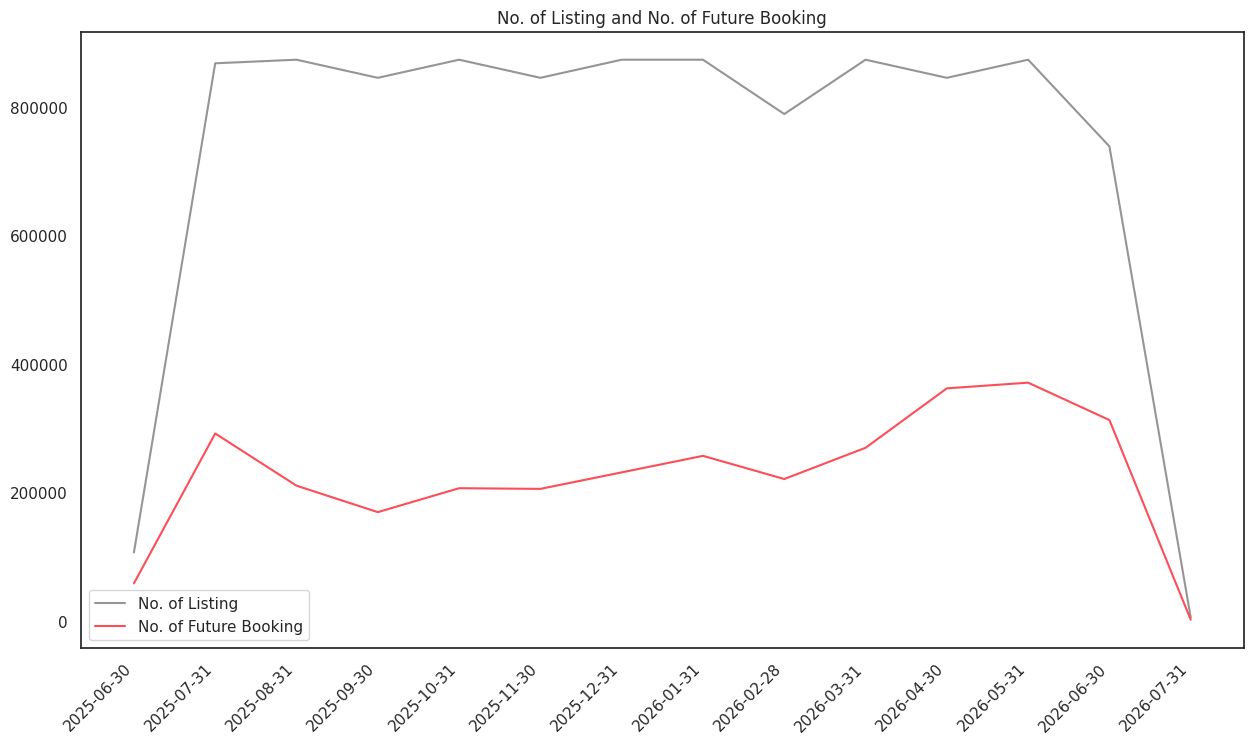

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

primaryColor = '#fd4d58'
secondaryColor = '#969494'
sns.set(style='white', font_scale=1)

totalListingCount = calendar_df.groupby([pd.Grouper(key='date', freq='M')]).agg(listingIdCount = ('listing_id','count')).reset_index()
stateListingCount = calendar_df.groupby([pd.Grouper(key='date', freq='M'), 'available']).agg(listingIdCount = ('listing_id','count')).reset_index().sort_values('available', ascending=False)
supplyAndDemandListingCount = totalListingCount.merge(stateListingCount[stateListingCount['available'] == "f"], how='left', on='date', suffixes=('_total', '_booked'))
supplyAndDemandListingCount.sort_values('date', inplace=True)

fig, (ax1) = plt.subplots(1, 1, figsize=(15,8))
xData = supplyAndDemandListingCount['date'].dt.strftime('%Y-%m-%d')
yData_total = supplyAndDemandListingCount['listingIdCount_total']
yData_booked = supplyAndDemandListingCount['listingIdCount_booked']
ax1.plot(xData, yData_total, label = "No. of Listing", color=secondaryColor)
ax1.plot(xData, yData_booked,label = "No. of Future Booking", color=primaryColor)
ax1.set_title("No. of Listing and No. of Future Booking")
ax1.legend()
ax1.set_xticklabels(labels=xData, rotation=45, ha='right')
# plt.savefig(f"./output/totalListingCount.png", dpi=1200, facecolor=fig.get_facecolor())

## Room Type

In [ ]:
cleaned_listings_df['room_type'].value_counts()

,count
room_type,
Entire home/apt,18400
Private room,9080
Hotel room,394
Shared room,322


## Occupancy rate

In [ ]:
# calcuate the occupation rate
cleaned_listings_df['estimated_occupancy_rate'] = 0
cleaned_listings_df['estimated_occupancy_rate'] = cleaned_listings_df['estimated_occupancy_l365d'] / 365

In [ ]:
# 0% occupancy rate
count_occupancy_0 = (cleaned_listings_df['estimated_occupancy_rate'] == 0).value_counts()
count_occupancy_0

,count
estimated_occupancy_rate,
False,14826
True,13370


In [ ]:
# Drop row with 0% occupancy rate
cleaned_listings_df_v1 = cleaned_listings_df[cleaned_listings_df['estimated_occupancy_rate'] != 0]

## Average revenue Per Available Room (RevPAR) & Revenue Per Available Listing (RevPAL)

In [ ]:
# Aggregate data
df_revpar = cleaned_listings_df_v1.groupby('room_type').agg(
    total_listings=('room_type', 'count'),
    avg_price=('price', 'mean'),
    avg_occupancy_rate=('estimated_occupancy_rate', 'mean')
)

# Calculate RevPAN
df_revpar['RevPAR'] = df_revpar['avg_price'] * df_revpar['avg_occupancy_rate']

# Calculate RevPAL
df_revpar['RevPAL'] = df_revpar['RevPAR'] * 365 * df_revpar['total_listings']

df_revpar[['total_listings', 'avg_price', 'avg_occupancy_rate', 'RevPAR', 'RevPAL']]

,total_listings,avg_price,avg_occupancy_rate,RevPAR,RevPAL
room_type,,,,,
Entire home/apt,11114,2050.457171,0.316969,649.930543,2.636515e+09
Hotel room,136,1654.132353,0.155077,256.517140,1.273351e+07
Private room,3454,1532.236248,0.185181,283.740386,3.577143e+08
Shared room,122,443.352459,0.091803,40.701209,1.812425e+06


# Hosts Experience

## Host Distribution - Junior Hosts vs Senior Hosts

In [ ]:
cleaned_listings_df_v1['host_experience_year'].describe()

,host_experience_year
count,14322.000000
mean,6.550272
std,3.692252
min,0.000000
25%,3.000000
50%,7.000000
75%,10.000000
max,16.000000


In [ ]:
# define host types based on the number of listings
def define_host_type_experience(row):
    if row['host_experience_year'] < 5:
        return 'Junior Host'
    else:
        return 'Senior Host'

# Apply the function to create a new column for host type
cleaned_listings_df_v1["host_type_experience"] = cleaned_listings_df_v1.apply(define_host_type_experience, axis=1)
cleaned_listings_df_v1["host_type_experience"].value_counts()

/tmp/ipython-input-2036481343.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_listings_df_v1["host_type_experience"] = cleaned_listings_df_v1.apply(define_host_type_experience, axis=1)


,count
host_type_experience,
Senior Host,10299
Junior Host,4527


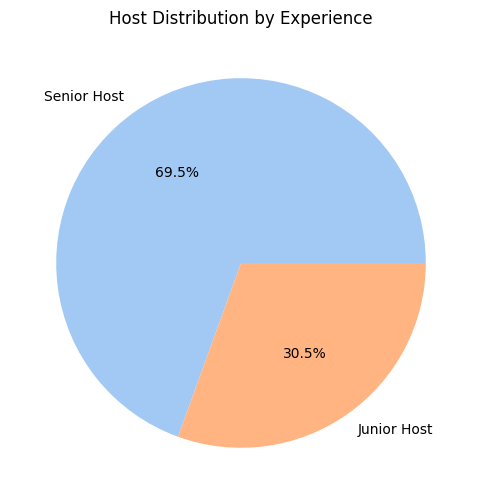

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count distribution
host_dist = cleaned_listings_df_v1["host_type_experience"].value_counts().reset_index()
host_dist.columns = ['Category', 'Count']

# Suggested Graph: Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(host_dist['Count'], labels=host_dist['Category'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Host Distribution by Experience')
plt.show()

## Host Distribution - Host Experience with Superhosts

In [ ]:
df_host_experience_superhost = cleaned_listings_df_v1.groupby(by=["host_type_experience","host_is_superhost"]).agg({"host_id":'count'})
df_host_experience_superhost["host_id"].sort_values(ascending = False)
df_host_experience_superhost

host_id
host_type_experience host_is_superhost         
Junior Host          f                     2967
                     t                     1560
Senior Host          f                     5646
                     t                     4653

## Host Experience vs Superhosts vs Occupancy Rate

/tmp/ipython-input-128977.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_listings_df_v1['host_combo'] = list(zip(cleaned_listings_df_v1['host_type_experience'], cleaned_listings_df_v1['host_is_superhost']))


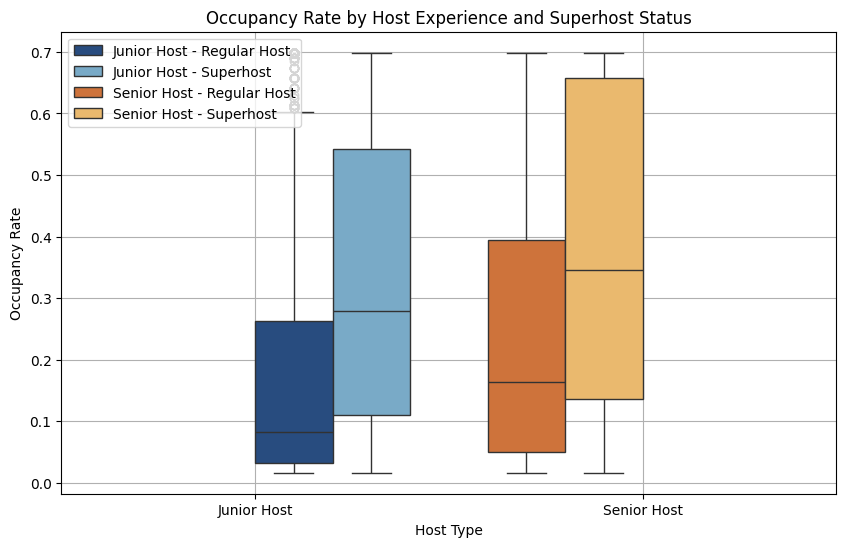

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom palette
palette = {
    ('Junior Host', 'f'): '#194a8d',
    ('Junior Host', 't'): '#6cadd4',
    ('Senior Host', 'f'): '#e66d22',
    ('Senior Host', 't'): '#ffbd59'
}

# Create a new column for combined hue
cleaned_listings_df_v1['host_combo'] = list(zip(cleaned_listings_df_v1['host_type_experience'], cleaned_listings_df_v1['host_is_superhost']))

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=cleaned_listings_df_v1,
    x='host_type_experience',
    y='estimated_occupancy_rate',
    hue='host_combo',
    palette=palette
)

# Customize legend to match palette order
handles, labels = plt.gca().get_legend_handles_labels()
ordered_keys = list(palette.keys())
label_map = {
    ('Junior Host', 'f'): 'Junior Host - Regular Host',
    ('Junior Host', 't'): 'Junior Host - Superhost',
    ('Senior Host', 'f'): 'Senior Host - Regular Host',
    ('Senior Host', 't'): 'Senior Host - Superhost'
}
new_labels = [label_map[key] for key in ordered_keys]
new_handles = [handles[labels.index(str(key))] for key in ordered_keys]

plt.legend(handles=new_handles, labels=new_labels, title='', loc='upper left')

plt.title('Occupancy Rate by Host Experience and Superhost Status')
plt.xlabel('Host Type')
plt.ylabel('Occupancy Rate')
plt.grid(True)
plt.show()


## Host Experience vs Review_per_month

In [ ]:
cleaned_listings_df_v1["reviews_per_month"].describe()

,reviews_per_month
count,14826.000000
mean,1.194471
std,1.565756
min,0.020000
25%,0.330000
50%,0.720000
75%,1.580000
max,54.030000


In [ ]:
cleaned_listings_df_v1["reviews_per_month"].value_counts()

,count
reviews_per_month,
1.00,300
0.17,266
0.21,163
0.34,161
0.16,160
...,...
7.43,1
5.30,1
5.88,1


In [ ]:
reviews_per_month_round = round(cleaned_listings_df_v1["reviews_per_month"],0)
reviews_per_month_round.value_counts()

,count
reviews_per_month,
0.0,5686
1.0,5187
2.0,2128
3.0,955
4.0,501
5.0,194
6.0,76
7.0,31
8.0,23


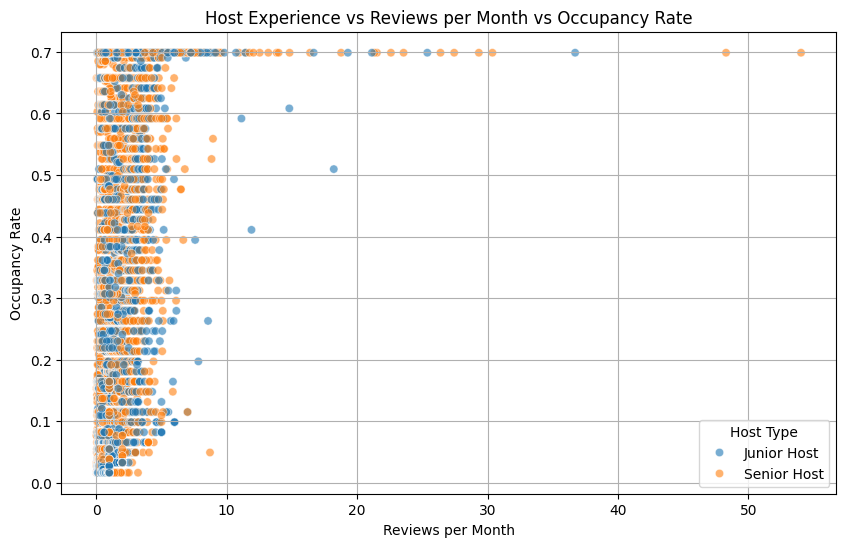

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
subset = cleaned_listings_df_v1[['host_type_experience', 'reviews_per_month', 'estimated_occupancy_rate']].dropna()

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=subset, x='reviews_per_month', y='estimated_occupancy_rate', hue='host_type_experience', alpha=0.6)
plt.title('Host Experience vs Reviews per Month vs Occupancy Rate')
plt.xlabel('Reviews per Month')
plt.ylabel('Occupancy Rate')
plt.legend(title='Host Type')
plt.grid(True)
plt.show()

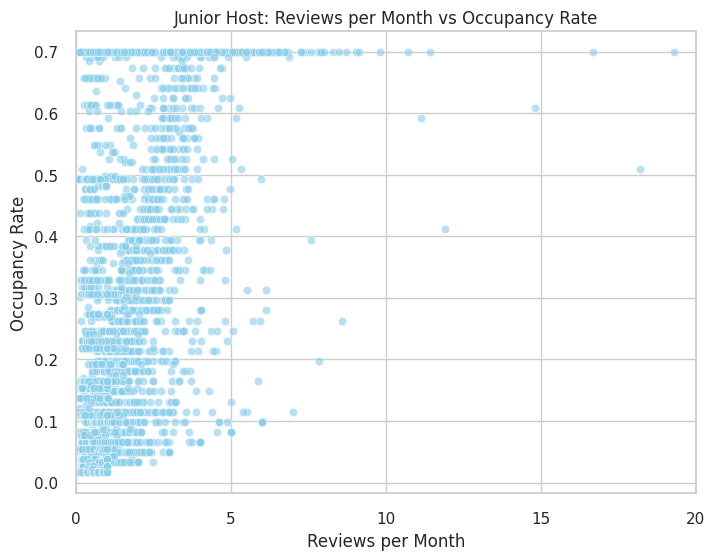

In [ ]:
# Filter Junior Hosts
junior_host_df_1 = cleaned_listings_df_v1[cleaned_listings_df_v1['host_type_experience'] == 'Junior Host'][['reviews_per_month', 'estimated_occupancy_rate']].dropna()

# Plot scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=junior_host_df_1, x='reviews_per_month', y='estimated_occupancy_rate', color='skyblue', alpha=0.6)
plt.title('Junior Host: Reviews per Month vs Occupancy Rate')
plt.xlabel('Reviews per Month')
plt.ylabel('Occupancy Rate')
plt.xlim(0, 20)
plt.xticks(range(0, 21, 5))
plt.grid(True)
plt.show()

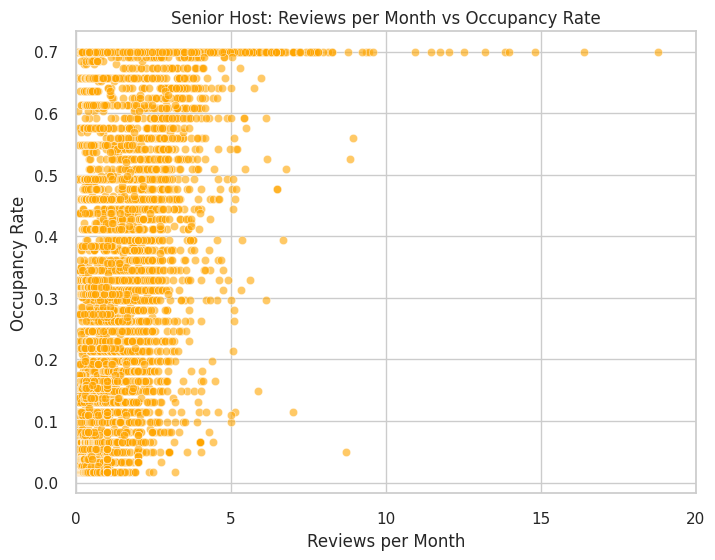

In [ ]:
# Filter Senior Hosts
senior_host_df_1 = cleaned_listings_df_v1[cleaned_listings_df_v1['host_type_experience'] == 'Senior Host'][['reviews_per_month', 'estimated_occupancy_rate']].dropna()

# Plot scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=senior_host_df_1, x='reviews_per_month', y='estimated_occupancy_rate', color='orange', alpha=0.6)
plt.title('Senior Host: Reviews per Month vs Occupancy Rate')
plt.xlabel('Reviews per Month')
plt.ylabel('Occupancy Rate')
plt.xlim(0, 20)
plt.xticks(range(0, 21, 5))
plt.grid(True)
plt.show()

## Host Experience vs Review Score vs Occupancy

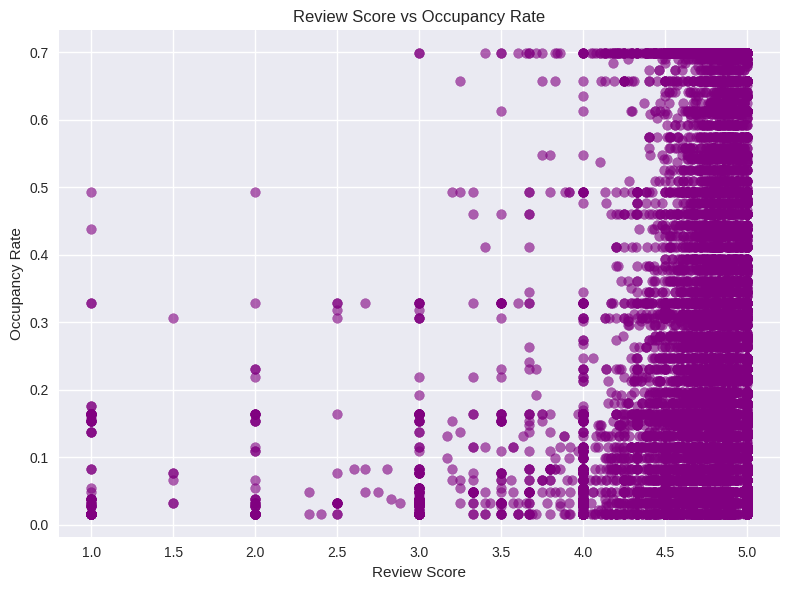

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Scatter Plot
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(8, 6))

# Plot Occupancy Rate vs Review Score
plt.scatter(cleaned_listings_df_v1['review_scores_rating'], cleaned_listings_df_v1['estimated_occupancy_rate'],
            color='purple', alpha=0.6, marker='o')

# Labels and Title
plt.title('Review Score vs Occupancy Rate')
plt.xlabel('Review Score')
plt.ylabel('Occupancy Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

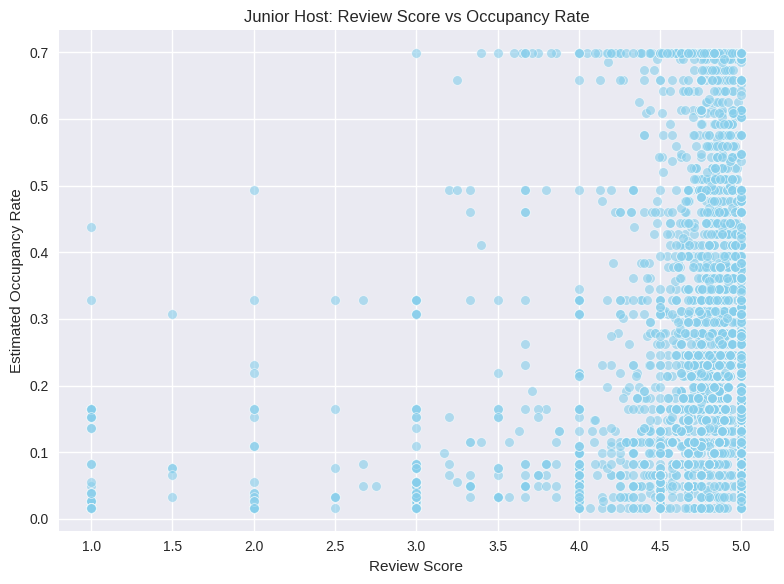

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter Junior Hosts
junior_host_df_2 = cleaned_listings_df_v1[cleaned_listings_df_v1['host_type_experience'] == 'Junior Host']

# Scatter Plot
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(8, 6))

# Labels and Title
plt.figure(figsize=(8,6))
sns.scatterplot(data=junior_host_df_2, x='review_scores_rating', y='estimated_occupancy_rate', color='skyblue', alpha=0.6)
plt.title('Junior Host: Review Score vs Occupancy Rate')
plt.xlabel('Review Score')
plt.ylabel('Estimated Occupancy Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

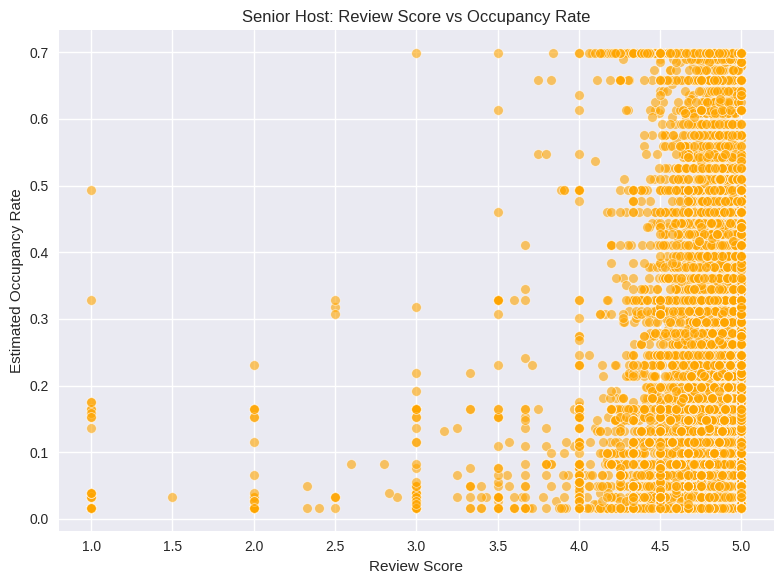

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter Senior Hosts
senior_host_df_2 = cleaned_listings_df_v1[cleaned_listings_df_v1['host_type_experience'] == 'Senior Host']

# Scatter Plot
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(8, 6))

# Labels and Title
plt.figure(figsize=(8,6))
sns.scatterplot(data=senior_host_df_2, x='review_scores_rating', y='estimated_occupancy_rate', color='orange', alpha=0.6)
plt.title('Senior Host: Review Score vs Occupancy Rate')
plt.xlabel('Review Score')
plt.ylabel('Estimated Occupancy Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

## Host Experience vs Response Rate

In [ ]:
cleaned_listings_df_v1['host_response_rate'].describe()

,host_response_rate
count,14826.000000
mean,0.910652
std,0.264210
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
# define response_rate_category based on the number of listings
def define_response_rate_category(row):
    if row['host_response_rate'] < 0.9:
        return 'Low response rate'
    else:
        return 'High response rate'

# Apply the function to create a new column for host type
cleaned_listings_df_v1["host_response_rate_category"] = cleaned_listings_df_v1.apply(define_response_rate_category, axis=1)
cleaned_listings_df_v1["host_response_rate_category"].value_counts()

/tmp/ipython-input-951184843.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_listings_df_v1["host_response_rate_category"] = cleaned_listings_df_v1.apply(define_response_rate_category, axis=1)


,count
host_response_rate_category,
High response rate,13067
Low response rate,1759


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by host experience and response rate category
df_host_response_rate = cleaned_listings_df_v1.groupby(
    by=["host_type_experience", "host_response_rate_category"]
).agg({
    "host_id": "count",
    "estimated_occupancy_rate": "mean"
}).reset_index()


df_host_response_rate.sort_values(by="host_id", ascending=False).head()

/tmp/ipython-input-4165813656.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_host_response_rate = cleaned_listings_df_v1.groupby(


,host_type_experience,host_response_rate_category,host_id,estimated_occupancy_rate
2,Senior Host,High response rate,8985,0.316374
0,Junior Host,High response rate,4082,0.239158
3,Senior Host,Low response rate,1314,0.233473
1,Junior Host,Low response rate,445,0.155161


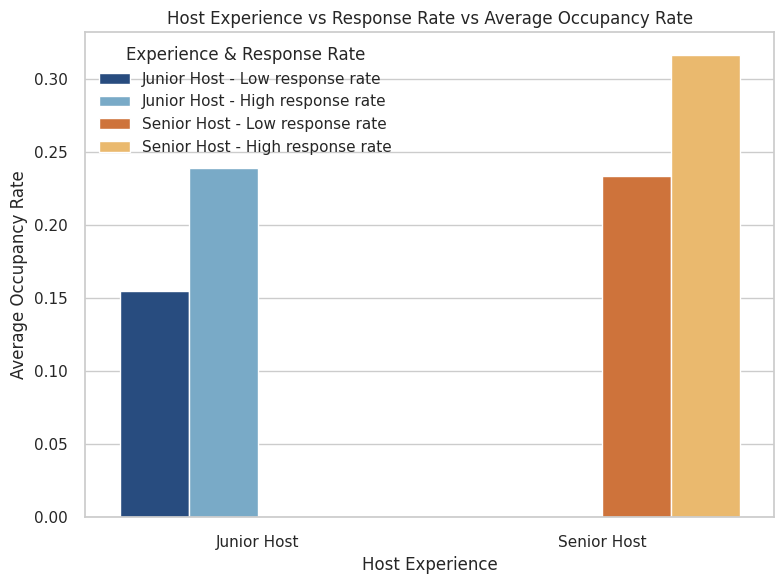

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group and aggregate data
df_host_response_rate = cleaned_listings_df_v1.groupby(
    ["host_type_experience", "host_response_rate_category"], observed=True
).agg({
    "host_id": "count",
    "estimated_occupancy_rate": "mean"
}).reset_index()

# Step 2: Rename columns
df_host_response_rate.rename(columns={
    "host_id": "host_count",
    "estimated_occupancy_rate": "avg_occupancy_rate"
}, inplace=True)

# Step 3: Convert categories to strings before combining
df_host_response_rate["combined"] = df_host_response_rate["host_type_experience"].astype(str) + " - " + df_host_response_rate["host_response_rate_category"].astype(str)

# Step 4: Define custom color palette
custom_palette_1 = {
    "Junior Host - Low response rate": "#194a8d",
    "Junior Host - High response rate": "#6cadd4",
    "Senior Host - Low response rate": "#e66d22",
    "Senior Host - High response rate": "#ffbd59"
}

# Step 5: Plotting
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Step 6: Draw grouped bar chart
sns.barplot(
    data=df_host_response_rate,
    x="host_type_experience",
    y="avg_occupancy_rate",
    hue="combined",
    hue_order=[
        "Junior Host - Low response rate",
        "Junior Host - High response rate",
        "Senior Host - Low response rate",
        "Senior Host - High response rate"
    ],
    palette=custom_palette_1
)

# Step 7: Customize labels and layout
plt.title("Host Experience vs Response Rate vs Average Occupancy Rate")
plt.xlabel("Host Experience")
plt.ylabel("Average Occupancy Rate")
plt.legend(title="Experience & Response Rate", loc="upper left")
plt.tight_layout()
plt.show()

## Host Experience vs Occupancy rate vs Price

In [ ]:
def define_estimated_occupancy_rate_category(row):
    if row['estimated_occupancy_rate'] > 0.5:
        return 'High occupancy rate'
    else:
        return 'Low occupancy rate'


# Apply the function to create a new column for host type
cleaned_listings_df_v1["estimated_occupancy_rate_category"] = cleaned_listings_df_v1.apply(define_estimated_occupancy_rate_category, axis=1)
cleaned_listings_df_v1["estimated_occupancy_rate_category"].value_counts()

df_host_experience_superhost = cleaned_listings_df_v1.groupby(by=["host_type_experience",'estimated_occupancy_rate_category']).agg({"host_id":'count'})
df_host_experience_superhost["host_id"].sort_values(ascending = False)
df_host_experience_superhost

/tmp/ipython-input-2081849055.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_listings_df_v1["estimated_occupancy_rate_category"] = cleaned_listings_df_v1.apply(define_estimated_occupancy_rate_category, axis=1)
/tmp/ipython-input-2081849055.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_host_experience_superhost = cleaned_listings_df_v1.groupby(by=["host_type_experience",'estimated_occupancy_rate_category']).agg({"host_id":'count'})


host_id
host_type_experience estimated_occupancy_rate_category         
Junior Host          High occupancy rate                    736
                     Low occupancy rate                    3791
Senior Host          High occupancy rate                   2700
                     Low occupancy rate                    7599

In [ ]:
# Calculate the average price by host type and occupancy rate
df_average_price_by_host_and_room = cleaned_listings_df_v1.groupby(['host_type_experience','room_type','estimated_occupancy_rate_category'])['price'].mean().reset_index()
df_average_price_by_host_and_room

/tmp/ipython-input-212931908.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_average_price_by_host_and_room = cleaned_listings_df_v1.groupby(['host_type_experience','room_type','estimated_occupancy_rate_category'])['price'].mean().reset_index()


,host_type_experience,room_type,estimated_occupancy_rate_category,price
0,Junior Host,Entire home/apt,High occupancy rate,1710.461538
1,Junior Host,Entire home/apt,Low occupancy rate,2441.439809
2,Junior Host,Hotel room,High occupancy rate,NaN
3,Junior Host,Hotel room,Low occupancy rate,NaN
4,Junior Host,Private room,High occupancy rate,1190.045872
5,Junior Host,Private room,Low occupancy rate,1230.898515
6,Junior Host,Shared room,High occupancy rate,363.333333
7,Junior Host,Shared room,Low occupancy rate,424.516129
8,Senior Host,Entire home/apt,High occupancy rate,1745.037895
9,Senior Host,Entire home/apt,Low occupancy rate,2042.137192


## Host Experience vs Superhost vs Price

In [ ]:
df_host_experience_superhost_price = cleaned_listings_df_v1.groupby(by=["host_type_experience","host_is_superhost",'estimated_occupancy_rate_category']).agg({"host_id":'count'})
df_host_experience_superhost_price["host_id"].sort_values(ascending = False)
df_host_experience_superhost_price

/tmp/ipython-input-501468514.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_host_experience_superhost_price = cleaned_listings_df_v1.groupby(by=["host_type_experience","host_is_superhost",'estimated_occupancy_rate_category']).agg({"host_id":'count'})


host_id
host_type_experience host_is_superhost estimated_occupancy_rate_category         
Junior Host          f                 High occupancy rate                    322
                                       Low occupancy rate                    2645
                     t                 High occupancy rate                    414
                                       Low occupancy rate                    1146
Senior Host          f                 High occupancy rate                    999
                                       Low occupancy rate                    4647
                     t                 High occupancy rate                   1701
                                       Low occupancy rate                    2952

In [ ]:
# Calculate the average price by superhosts
df_average_price_by_superhosts_and_room = cleaned_listings_df_v1.groupby(['host_type_experience',"host_is_superhost",'room_type'])['price'].mean().reset_index()
df_average_price_by_superhosts_and_room

/tmp/ipython-input-4086659423.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_average_price_by_superhosts_and_room = cleaned_listings_df_v1.groupby(['host_type_experience',"host_is_superhost",'room_type'])['price'].mean().reset_index()


,host_type_experience,host_is_superhost,room_type,price
0,Junior Host,f,Entire home/apt,2156.041350
1,Junior Host,f,Hotel room,NaN
2,Junior Host,f,Private room,1166.894479
3,Junior Host,f,Shared room,426.895833
4,Junior Host,t,Entire home/apt,2580.637416
5,Junior Host,t,Hotel room,NaN
6,Junior Host,t,Private room,1325.187747
7,Junior Host,t,Shared room,407.000000
8,Senior Host,f,Entire home/apt,1898.151721
9,Senior Host,f,Hotel room,1706.053922


## Host - Correlations

/tmp/ipython-input-3651970282.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_listings_df_v1['host_is_superhost_transform'] = 0
/tmp/ipython-input-3651970282.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_listings_df_v1['host_is_superhost_transform'] = cleaned_listings_df['host_is_superhost'].replace({'t': 1, 'f': 0})
/tmp/ipython-input-3651970282.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

                             host_experience_year  \
host_experience_year                     1.000000   
host_is_superhost_transform              0.150323   
estimated_occupancy_rate                 0.172012   
host_response_rate                       0.022607   
review_scores_rating                     0.081600   
reviews_per_month                       -0.004556   

                             host_is_superhost_transform  \
host_experience_year                            0.150323   
host_is_superhost_transform                     1.000000   
estimated_occupancy_rate                        0.277944   
host_response_rate                              0.094853   
review_scores_rating                            0.254606   
reviews_per_month                               0.125469   

                             estimated_occupancy_rate  host_response_rate  \
host_experience_year                         0.172012            0.022607   
host_is_superhost_transform                  0.277944

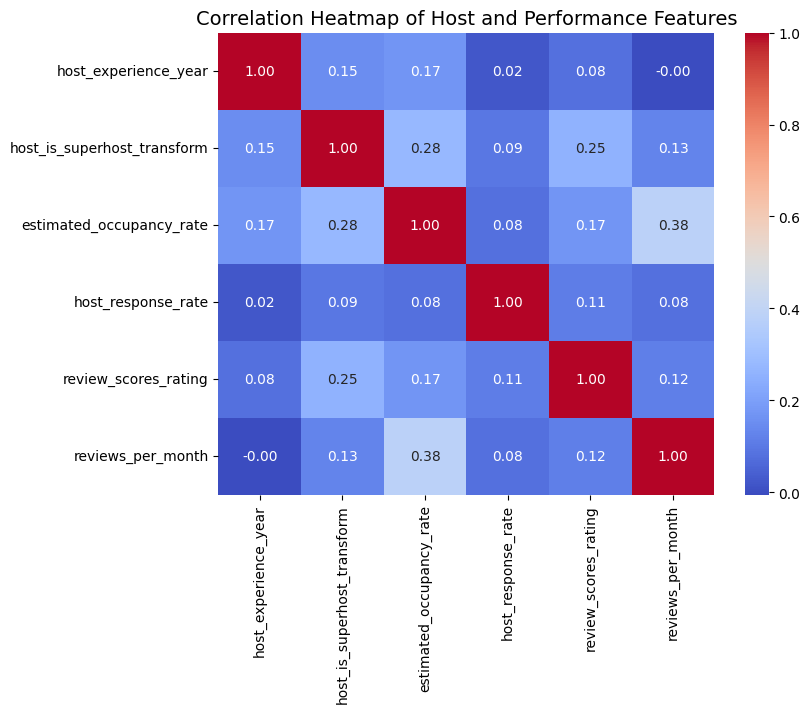

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

cleaned_listings_df_v1['host_is_superhost_transform'] = 0
cleaned_listings_df_v1['host_is_superhost_transform'] = cleaned_listings_df['host_is_superhost'].replace({'t': 1, 'f': 0})


# Select the specific columns for correlation, including the transformed column
selected_columns = cleaned_listings_df_v1[['host_experience_year','host_is_superhost_transform',
                      'estimated_occupancy_rate',
                      'host_response_rate',
                      'review_scores_rating','reviews_per_month']]

# Calculate the correlation matrix for the selected columns
correlation_matrix = selected_columns.corr()
print(correlation_matrix)

# Create the heatmap
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.title("Correlation Heatmap of Host and Performance Features", fontsize=14)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.savefig("host_correlations.png")
plt.show()

# Review

## Load Data - Review

In [ ]:
import pandas as pd
host_review_df = pd.read_csv("/content/eng_review.csv")

In [ ]:
host_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271772 entries, 0 to 271771
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Unnamed: 0         271772 non-null  int64 
 1   listing_id         271772 non-null  int64 
 2   id                 271772 non-null  int64 
 3   date               271772 non-null  object
 4   reviewer_id        271772 non-null  int64 
 5   reviewer_name      271770 non-null  object
 6   comments           271772 non-null  object
 7   year               271772 non-null  int64 
 8   language_encoding  271772 non-null  object
 9   clean_text         271764 non-null  object
dtypes: int64(5), object(5)
memory usage: 20.7+ MB


In [ ]:
host_review_df = host_review_df.drop(columns=['Unnamed: 0'], errors='ignore')
host_review_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,year,language_encoding,clean_text
0,27934,589850938,2020-01-06,81236740,Wenrong,"Roomy than expected, with one bedroom, one liv...",2020,en,Roomy expected one bedroom one living room kic...
1,27934,1247551387958002555,2024-09-17,597249865,Kuniaki,"It was Very nice person, nice room!<br/>It was...",2024,en,nice person nice roomIt great
2,4786588,602562135383169069,2022-04-11,68315726,Michael,Great value and great location. Excellent comm...,2022,en,Great value great location Excellent communica...
3,4786588,675697320378821339,2022-07-21,1773626,Talisa,This place is conveniently located right on th...,2022,en,place conveniently located right main road min...
4,4786588,692405339424647600,2022-08-13,40393629,Ricky,Pros:<br/>* Host is very quick in solving prob...,2022,en,Pros Host quick solving problems providing sup...


## Sentiment Analysis

In [ ]:
! pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.2 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to analyze sentiment, with type checking
def analyze_sentiment(text):
    if isinstance(text, str):
        score = analyzer.polarity_scores(text)
        return score['compound']
    else:
        return 0.0  # 對於空值或非字串給予中性分數

# Apply sentiment analysis to each review
host_review_df['sentiment_score'] = host_review_df['clean_text'].apply(analyze_sentiment)

# Classify sentiment based on the score
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

host_review_df['sentiment_label'] = host_review_df['sentiment_score'].apply(classify_sentiment)

# Display the results
print(host_review_df[['year', 'comments', 'sentiment_score', 'sentiment_label']].head())

   year                                           comments  sentiment_score  \
0  2020  Roomy than expected, with one bedroom, one liv...           0.8271   
1  2024  It was Very nice person, nice room!<br/>It was...           0.8658   
2  2022  Great value and great location. Excellent comm...           0.9360   
3  2022  This place is conveniently located right on th...           0.9935   
4  2022  Pros:<br/>* Host is very quick in solving prob...           0.9752   

  sentiment_label  
0        Positive  
1        Positive  
2        Positive  
3        Positive  
4        Positive  


## Merge Data - Listing & Review

In [ ]:
# rename the column name as listing_id in cleaned_listings_df
cleaned_listings_df_v1 = cleaned_listings_df_v1.rename(columns={"id": "listing_id"})

In [ ]:
master_df_review = host_review_df.merge(cleaned_listings_df_v1, on=['listing_id'], how='left')
master_df_review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,year,language_encoding,clean_text,sentiment_score,...,calculated_host_listings_count_shared_rooms,reviews_per_month,host_experience_year,estimated_occupancy_rate,host_type_experience,host_combo,review_score_category,host_response_rate_category,estimated_occupancy_rate_category,host_is_superhost_transform
0,27934,589850938,2020-01-06,81236740,Wenrong,"Roomy than expected, with one bedroom, one liv...",2020,en,Roomy expected one bedroom one living room kic...,0.8271,...,0.0,0.40,15.0,0.082192,Senior Host,"(Senior Host, f)",High review score,Low response rate,Low occupancy rate,0.0
1,27934,1247551387958002555,2024-09-17,597249865,Kuniaki,"It was Very nice person, nice room!<br/>It was...",2024,en,nice person nice roomIt great,0.8658,...,0.0,0.40,15.0,0.082192,Senior Host,"(Senior Host, f)",High review score,Low response rate,Low occupancy rate,0.0
2,4786588,602562135383169069,2022-04-11,68315726,Michael,Great value and great location. Excellent comm...,2022,en,Great value great location Excellent communica...,0.9360,...,0.0,1.44,11.0,0.698630,Senior Host,"(Senior Host, t)",High review score,High response rate,High occupancy rate,1.0
3,4786588,675697320378821339,2022-07-21,1773626,Talisa,This place is conveniently located right on th...,2022,en,place conveniently located right main road min...,0.9935,...,0.0,1.44,11.0,0.698630,Senior Host,"(Senior Host, t)",High review score,High response rate,High occupancy rate,1.0
4,4786588,692405339424647600,2022-08-13,40393629,Ricky,Pros:<br/>* Host is very quick in solving prob...,2022,en,Pros Host quick solving problems providing sup...,0.9752,...,0.0,1.44,11.0,0.698630,Senior Host,"(Senior Host, t)",High review score,High response rate,High occupancy rate,1.0


## Mismatch - Sentiment label vs Occupancy rate

In [ ]:
master_df_review['sentiment_label'].value_counts()

,count
sentiment_label,
Positive,261653
Neutral,5217
Negative,4902


In [ ]:
df_sentiment_label_count = master_df_review.groupby(by=["estimated_occupancy_rate_category","sentiment_label"]).agg({"listing_id":'count'})
df_sentiment_label_count["listing_id"].sort_values(ascending = False)
df_sentiment_label_count

listing_id
estimated_occupancy_rate_category sentiment_label            
High occupancy rate               Negative               1819
                                  Neutral                2504
                                  Positive             132678
Low occupancy rate                Negative               2760
                                  Neutral                2501
                                  Positive             120033

**Define Thresholds**

* Low occupancy threshold (0.4): Indicates the property is underutilized. Below 40% is generally considered poor performance.

* High sentiment threshold (0.5): TextBlob sentiment ranges from -1 to +1. A score above 0.5 suggests the review is clearly positive.

In [ ]:
# Define Thresholds
low_occupancy_threshold = 0.4
high_sentiment_threshold = 0.5

# Find Mismatches
mismatches = master_df_review[
    (master_df_review['estimated_occupancy_rate'] < low_occupancy_threshold) &
    (master_df_review['sentiment_score'] > high_sentiment_threshold)
]

# Calculate the number of mismatched items
mismatch_count = len(mismatches)
print(f"Number of mismatches: {mismatch_count}")

# Visualize or Export
print("Mismatches (Low occupancy but positive reviews):")
print(mismatches[['estimated_occupancy_rate', 'comments', 'sentiment_score']])

Number of mismatches: 85094
Mismatches (Low occupancy but positive reviews):
        estimated_occupancy_rate  \
0                       0.082192   
1                       0.082192   
14                      0.065753   
15                      0.065753   
16                      0.065753   
...                          ...   
271767                  0.016438   
271768                  0.032877   
271769                  0.016438   
271770                  0.241096   
271771                  0.241096   

                                                 comments  sentiment_score  
0       Roomy than expected, with one bedroom, one liv...           0.8271  
1       It was Very nice person, nice room!<br/>It was...           0.8658  
14      Great location walkable to the river, dining a...           0.9727  
15      Good size room I thought the property was good...           0.9493  
16      One of the best places I've stayed on Airbnb. ...           0.9380  
...                         

## Word Cloud

In [ ]:
!pip install wordcloud matplotlib

Text(0.5, 1.0, 'Positive Comments with Low Occupancy Rate')

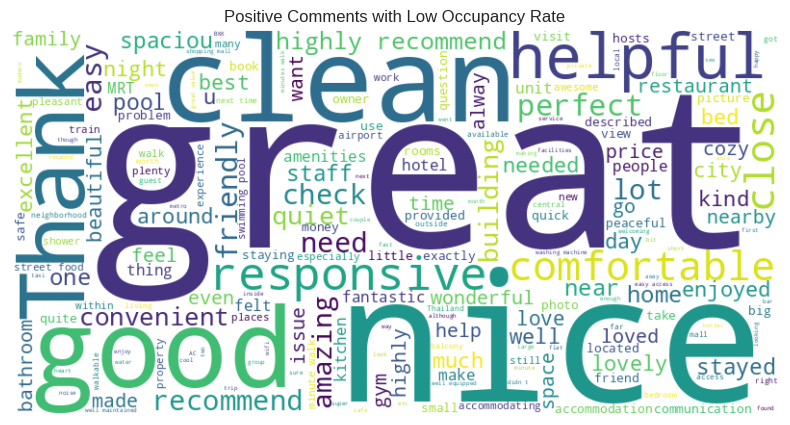

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Add custom stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.update([
    'really', 'will', 's', 'location', 'definitely', 'host', 'br', 'apartment', 'stay', 'everything',
    'location', 'overall', 'recommended', 'come', 'back', 'place', 'Bangkok', 'area', 'find',
    'Airbnb', 'house', 'cando', 'condo', 'room', 'walking', 'distance', 'bts station','bts', 'station'
])

# Generate Word Cloud from comments
text = ' '.join(mismatches['comments'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=custom_stopwords).generate(text)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Comments with Low Occupancy Rate')